In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gdp_df = pd.read_csv(r"C:\Users\dougl\DA12\projects\un-python-Dkaplan8\data\gdp_percapita.csv")

In [3]:
gdp_df.head(1)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape

(7662, 4)

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head(1)

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266


In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [8]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [9]:
gdp_df.loc[gdp_df['Year'].isna()]

,Country,Year,GDP_Per_Capita


In [10]:
gdp_df.isna().sum()
total_years_count = gdp_df['Year'].value_counts().sort_index()
print(total_years_count)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64


In [25]:
#No missing values in dataset but not every country has data for the same years

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
9. What was the median GDP per capita value in 2020?

In [26]:
gdp2020 = gdp_df[gdp_df['Year'] == 2020]

In [27]:
#Question 8
sns.set_theme(style='darkgrid')
sns.histplot(data=gdp_df, x='gdp2020', bins=20)
plt.show()

ValueError: Could not interpret value `gdp2020` for parameter `x`

C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


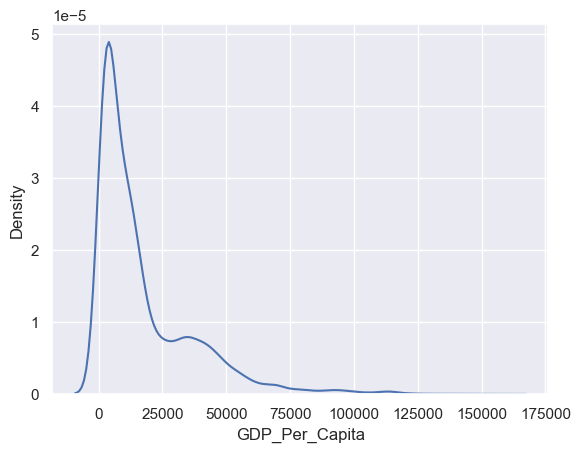

In [28]:
sns.kdeplot(gdp_df['GDP_Per_Capita'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

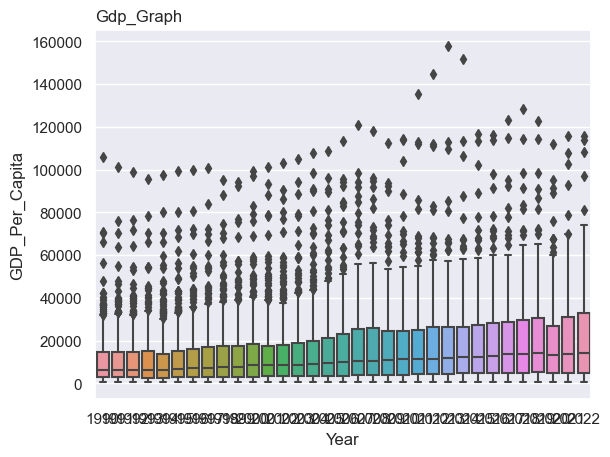

In [29]:
sns.boxplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])
plt.title('Gdp_Graph', loc='left')
plt.show

#ugly, look in walkthrough how to clean up

<function matplotlib.pyplot.show(close=None, block=None)>

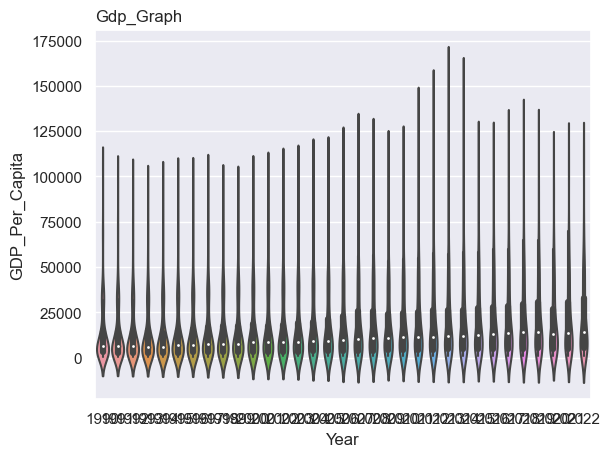

In [30]:
sns.violinplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])
plt.title('Gdp_Graph', loc='left')
plt.show

9. What was the median GDP per capita value in 2020?

In [31]:
gdp_2020_df = gdp_df[gdp_df['Year'] == 2020]
median_gdp_2020 = gdp_2020_df['GDP_Per_Capita'].median()
print(median_gdp_2020)

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

In [32]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

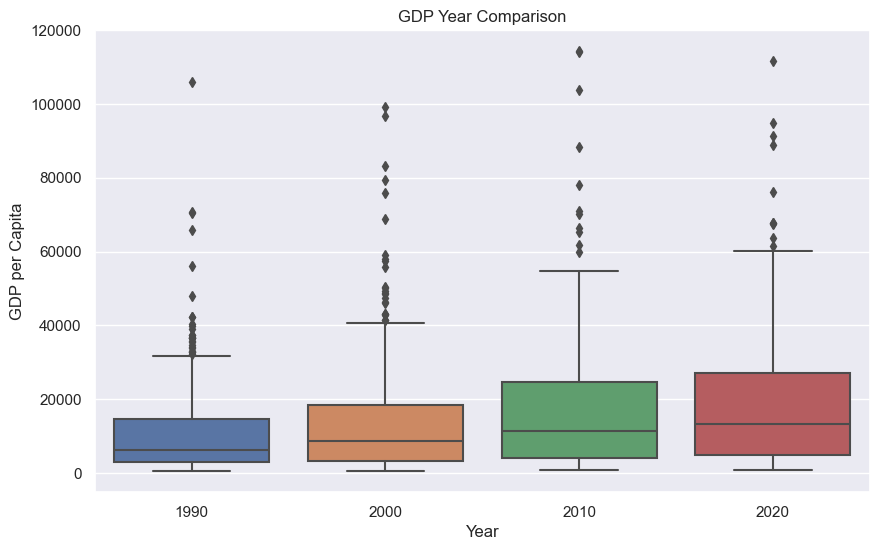

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

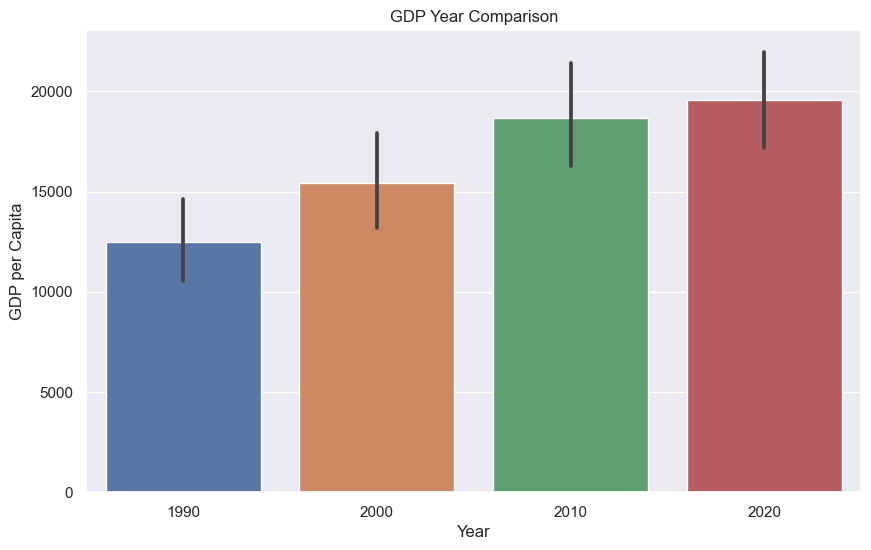

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

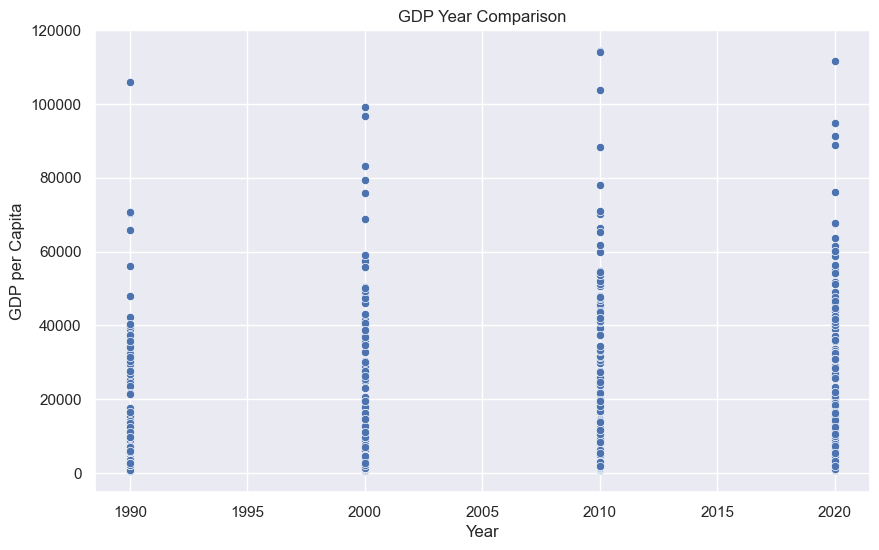

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

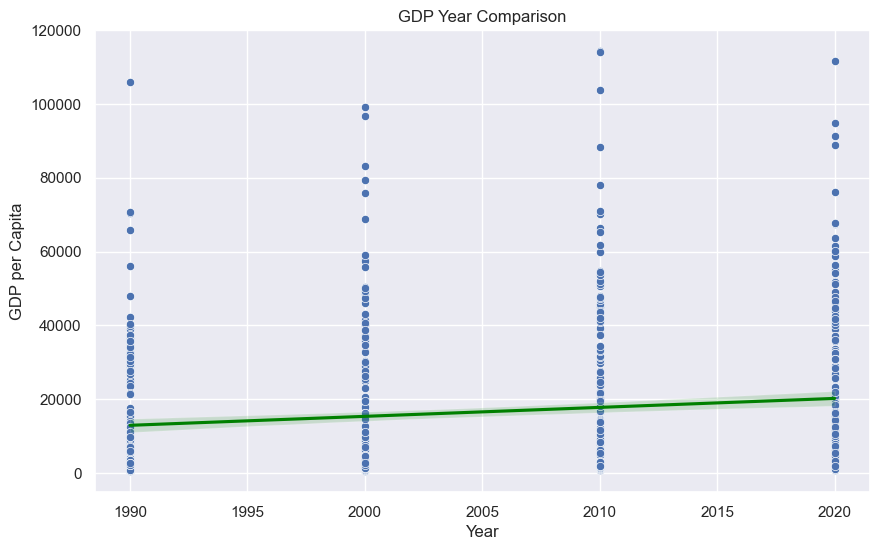

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', scatter=False, color='green')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [38]:
hi_gdp_df = gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [39]:
first_entry = hi_gdp_df.loc[hi_gdp_df['Year'].idxmin()]

In [40]:
first_country = first_entry['Country']

In [41]:
first_year = first_entry['Year']

In [42]:
first_gdp_per_capita = first_entry['GDP_Per_Capita']

In [43]:
print(first_country)

United Arab Emirates


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [45]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.